# Room 3


1.   Dila Yuliani Putri
2.   Dwiki Kusuma
3. Fadel Muhammad
4. Fauzan Kamil
5. Ghazi Taqiya Al-Anshari
6. Saeful Amri



## Import Library yg dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#tambahkan library sesuai kebutuhan
import numpy as np
import warnings
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
path = pd.read_csv('https://raw.githubusercontent.com/Fauzan-Kamil/piton-data/main/activity_km_07_01.csv')
data = path
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


In [ ]:
data.head()

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


In [ ]:
data['aksi'].value_counts()

Tidak melakukan apa-apa                 473
Hidupkan Lampu                           92
Hidupkan Lampu dan Pompa nutrisi TDS     39
Hidupkan Pompa nutrisi TDS               12
Name: aksi, dtype: int64

In [ ]:
data['cahaya'].value_counts()

Ada          302
Tidak ada    288
Name: cahaya, dtype: int64

In [ ]:
data['intensitas air'].value_counts()

Tinggi           154
Rendah sekali    154
Cukup            154
Rendah           154
Name: intensitas air, dtype: int64

## 1. Mengganti nama kolom yang menggunakan spasi

In [ ]:
#isi code
#data.columns = data.columns.str.replace(' ','_').str.lower() #.replace mengganti spasi menjadi underscore

data.columns= data.columns.str.replace(" ","_")
data.head()

#.str.lower() untuk mengganti kapital menjadi non-kapital

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [ ]:
#Isi Code

def getNumber(air):
    if air == "Rendah":
        return 0
    elif air == "Rendah sekali":
        return 1
    elif air =='Cukup':
        return 2
    else:
        return 3
data["intensitas_air"]=data["intensitas_air"].apply(getNumber)

data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,3,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,3,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,3,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,3,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,3,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,1,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,1,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,1,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,1,25.4,1052.0,3,Hidupkan Lampu


In [ ]:
#AKSI
def getnum(aks):
    if aks == "Tidak melakukan apa-apa":
        return 0
    elif aks == "Hidupkan Lampu dan Pompa nutrisi TDS":
        return 1
    elif aks == 'Hidupkan Lampu':
        return 2
    else:
        return 3
data["aksi"]=data["aksi"].apply(getnum)

data.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,3,27.0,188.0,622,1
1,5.7,Ada,3,26.9,79.0,557,1
2,6.0,Ada,3,27.0,11.0,491,1
3,6.5,Ada,3,27.1,345.0,12000,0
4,6.2,NaN,3,27.1,602.0,444,0


In [ ]:
data['cahaya']= data['cahaya'].map({'Ada':1, 'Tidak ada':0})
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,1
1,5.7,1.0,3,26.9,79.0,557,1
2,6.0,1.0,3,27.0,11.0,491,1
3,6.5,1.0,3,27.1,345.0,12000,0
4,6.2,NaN,3,27.1,602.0,444,0
...,...,...,...,...,...,...,...
611,4.6,1.0,1,25.3,904.0,47,2
612,2.1,1.0,1,25.0,388.0,18,1
613,3.2,1.0,1,25.3,793.0,19,2
614,1.4,1.0,1,25.4,1052.0,3,2


## 3. Handle Missing Value

In [ ]:
#Isi Code
mising = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/891)*100})
mising

,total_missing,perc_missing
PH,16,1.795735
cahaya,26,2.918070
intensitas_air,0,0.000000
suhu,27,3.030303
PPM,5,0.561167
tinggi_air,0,0.000000
aksi,0,0.000000


In [ ]:
#Melengkapi data ph
data['PH'].fillna(data['PH'].mean(), inplace=True)
data['PPM'].fillna(data['PPM'].mean(), inplace=True)
data['suhu'].fillna(data['suhu'].mean(), inplace=True)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,1
1,5.7,1.0,3,26.9,79.0,557,1
2,6.0,1.0,3,27.0,11.0,491,1
3,6.5,1.0,3,27.1,345.0,12000,0
4,6.2,NaN,3,27.1,602.0,444,0
...,...,...,...,...,...,...,...
611,4.6,1.0,1,25.3,904.0,47,2
612,2.1,1.0,1,25.0,388.0,18,1
613,3.2,1.0,1,25.3,793.0,19,2
614,1.4,1.0,1,25.4,1052.0,3,2


In [ ]:
#data['cahaya'].median()
data['cahaya'].fillna(data['cahaya'].median(), inplace=True)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,1
1,5.7,1.0,3,26.9,79.0,557,1
2,6.0,1.0,3,27.0,11.0,491,1
3,6.5,1.0,3,27.1,345.0,12000,0
4,6.2,1.0,3,27.1,602.0,444,0
...,...,...,...,...,...,...,...
611,4.6,1.0,1,25.3,904.0,47,2
612,2.1,1.0,1,25.0,388.0,18,1
613,3.2,1.0,1,25.3,793.0,19,2
614,1.4,1.0,1,25.4,1052.0,3,2


In [ ]:
mising = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/891)*100})
mising

,total_missing,perc_missing
PH,0,0.0
cahaya,0,0.0
intensitas_air,0,0.0
suhu,0,0.0
PPM,0,0.0
tinggi_air,0,0.0
aksi,0,0.0




















## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [ ]:
#Isi Code
data.columns

Index(['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi'], dtype='object')

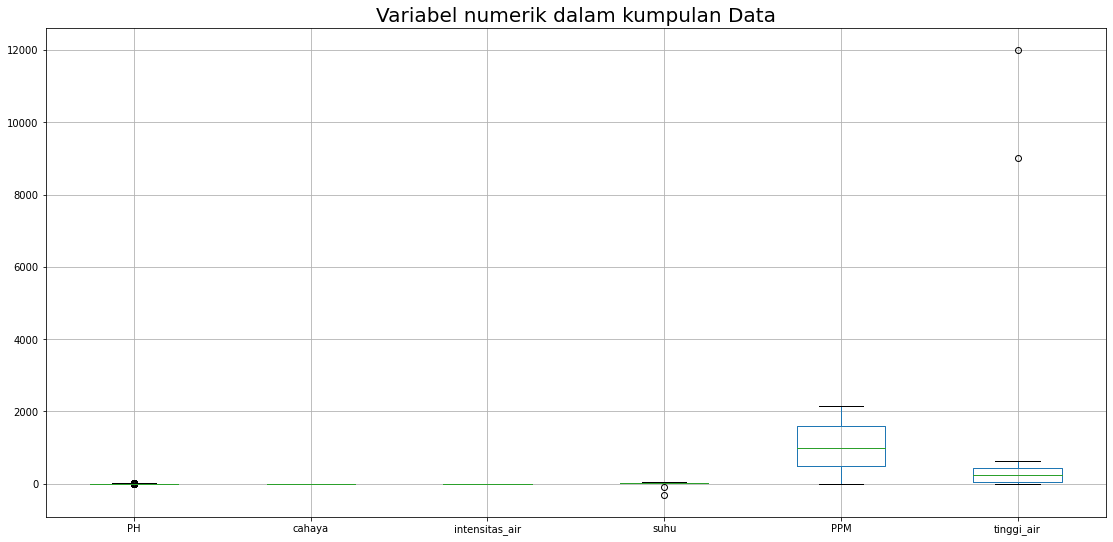

In [ ]:
#Sebelum Outliers di ganti
num_cols = ['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Variabel numerik dalam kumpulan Data", fontsize=20)
plt.show()

In [ ]:
#Untuk Melihat nilai yang outliers
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
outlir = {}
for num_col in num_cols:
  outlir[num_col] = detect_outliers_zscore(data[num_col])
  print("Data Outliers adalah (", num_col, ")", len(outlir[num_col]), "outlier :", outlir[num_col])

Data Outliers adalah ( PH ) 0 outlier : []
Data Outliers adalah ( cahaya ) 0 outlier : []
Data Outliers adalah ( intensitas_air ) 0 outlier : []
Data Outliers adalah ( suhu ) 2 outlier : [-300.0, -100.0]
Data Outliers adalah ( PPM ) 0 outlier : []
Data Outliers adalah ( tinggi_air ) 2 outlier : [12000, 9000]


In [ ]:
#Nilai yang Outlires di atas adalah tinggi_air dan suhu maka dari itu di ganti 
#Dengan mean dan modus
suhu_mean = data['suhu'].mean()
modus_tinggi_air = data['tinggi_air'].mode()
#print(suhu_mean)
#print(modus_tinggi_air)

In [ ]:
for i in outlir['tinggi_air']:
  data['tinggi_air']= np.where(data['tinggi_air']==i, modus_tinggi_air, data['tinggi_air'])

In [ ]:
for i in outlir['suhu']:
  data['suhu']= np.where(data['suhu']==i, suhu_mean, data['suhu'])

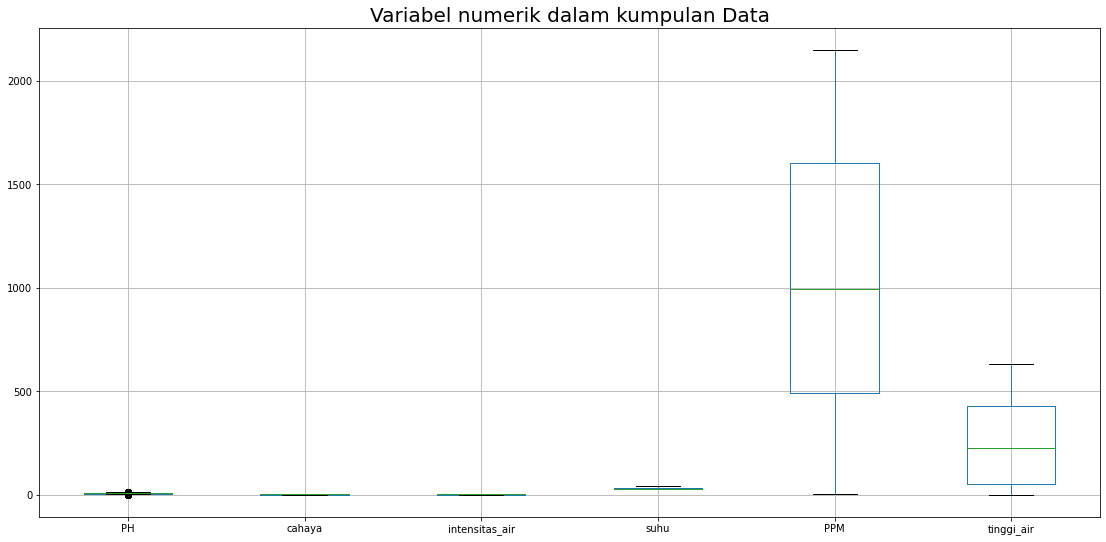

In [ ]:
#Sesudah outliers di ganti
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Variabel numerik dalam kumpulan Data", fontsize=20)
plt.show()

## 5. Pisahkan data feature dengan label

In [ ]:
#Isi Code
X = data[num_cols]
Y = data['aksi']

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [ ]:
#pip install imbalanced-learn
!pip install imbalanced-learn

In [ ]:
counter = Counter(Y)
print(counter)

Counter({0: 473, 2: 92, 1: 39, 3: 12})


In [ ]:
#Isi Code
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=10)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [ ]:
counter = Counter(Y_smote)
counter

Counter({0: 473, 1: 473, 2: 473, 3: 473})

## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi

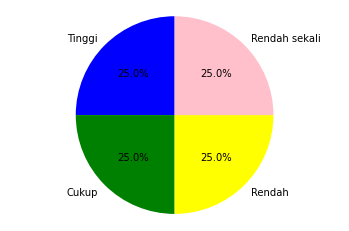

In [84]:
#Isi Code
import matplotlib.pyplot as plt
from matplotlib import style

tinggi = (data['intensitas_air'] == 3).sum() 
cukup = (data['intensitas_air'] == 2).sum() 
rendah = (data['intensitas_air'] == 0).sum() 
rendah_sek = (data['intensitas_air'] == 1).sum() 
p = [tinggi, cukup, rendah, rendah_sek]
plt.pie(p,    
        autopct='%1.1f%%', #Untuk menghitung persen
       labels = ['Tinggi', 'Cukup', 'Rendah', 'Rendah sekali'], 
       colors = ['blue','green','yellow','pink'],   
       #explode = (),    
       startangle = 90)  
plt.axis('equal')
#plt.legend() 
plt.show(50)

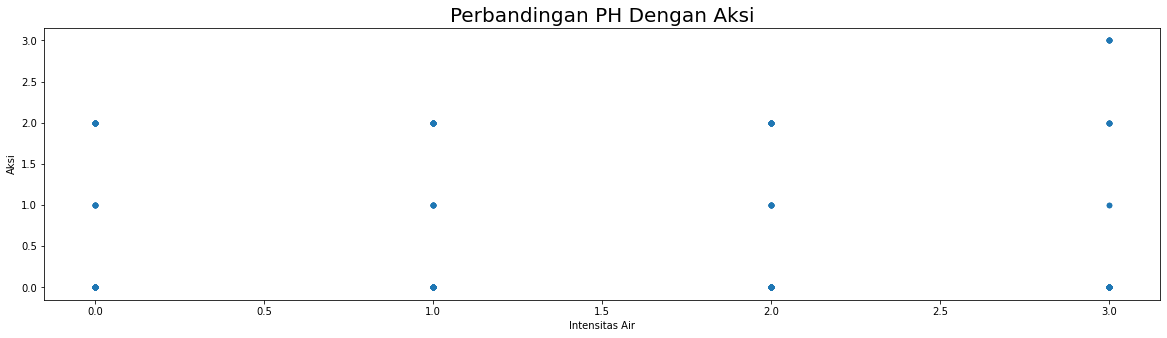

In [ ]:
data[['intensitas_air', 'aksi']].plot(kind='scatter', x='intensitas_air', y='aksi', figsize=(20, 5))

plt.title('Perbandingan PH Dengan Aksi', fontsize = 20)
plt.ylabel('Aksi', fontsize = 10)
plt.xlabel('Intensitas Air', fontsize = 10)

plt.show()


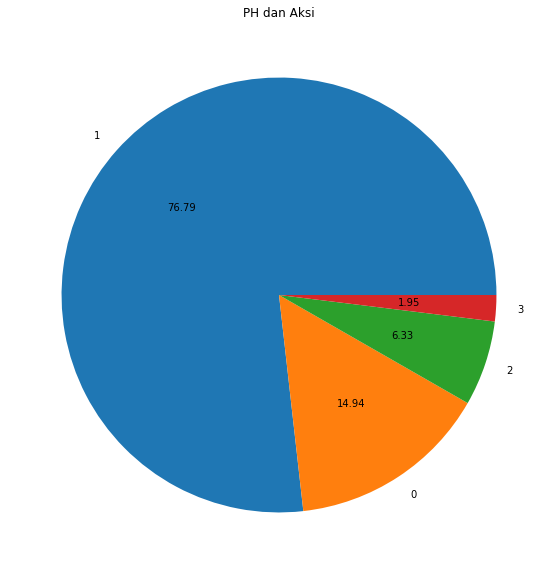

In [90]:
plt.figure(figsize=(10,10))
plt.pie(data['aksi'].value_counts(), labels=data['aksi'].unique(), autopct='%.2f')
plt.title('PH dan Aksi')
plt.show()

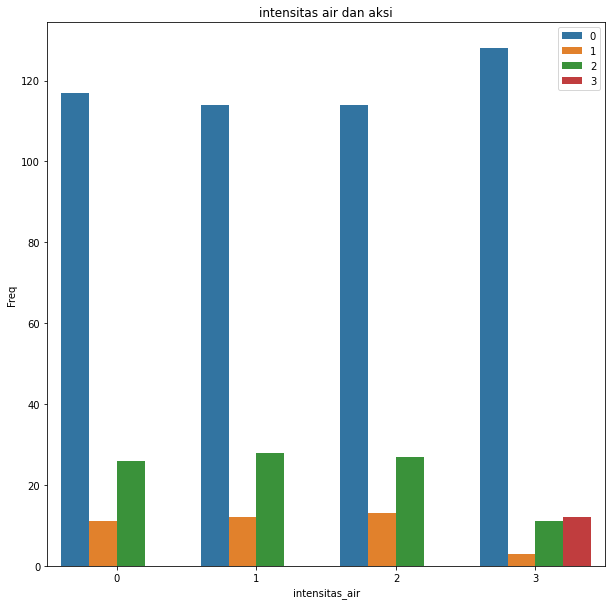

In [93]:
import seaborn as sns
bar_aksi = data.groupby('intensitas_air')['aksi'].value_counts().to_frame().rename(columns={'aksi':'Freq'}).reset_index().sort_values('intensitas_air')
bar_aksi.pivot_table('Freq',['aksi','intensitas_air'])

plt.figure(figsize=(10,10))
sns.barplot(data=bar_aksi,x="intensitas_air",y='Freq',hue='aksi')
plt.title("intensitas air dan aksi")
plt.legend(loc=0)
plt.show()

## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [ ]:
#Isi Kode
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(X_smote)
X_scaled

array([[0.46428571, 1.        , 1.        , 0.12820513, 0.08705773,
        0.98887122],
       [0.40714286, 1.        , 1.        , 0.12179487, 0.03631285,
        0.88553259],
       [0.42857143, 1.        , 1.        , 0.12820513, 0.00465549,
        0.78060413],
       ...,
       [0.62599773, 0.        , 1.        , 0.11538462, 0.11985182,
        0.74605812],
       [0.77670273, 0.        , 1.        , 0.11282992, 0.14334822,
        0.78381877],
       [0.71546664, 0.        , 1.        , 0.12510701, 0.24830878,
        0.91055026]])

## 9. Buat model ANN

In [ ]:
#Isi Code
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_smote, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
n_features = X_train.shape[1]

(1513, 6) (379, 6) (1513,) (379,)


In [ ]:
data1 = Sequential()
data1.add(Dense(16, activation='relu', input_shape=(n_features,)))
data1.add(Dense(8, activation='relu',))
data1.add(Dense(4, activation='softmax'))

In [ ]:
data1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                112       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________


In [ ]:
data1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
data1.fit(X_train, Y_train, epochs=10,batch_size=30)

Epoch 1/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9716
Epoch 2/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9663
Epoch 3/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9736
Epoch 4/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9696
Epoch 5/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9722
Epoch 6/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9683
Epoch 7/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9716
Epoch 8/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9709
Epoch 9/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9716
Epoch 10/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9703


In [86]:
history = data1.fit(X_train, Y_train, epochs=10,batch_size=30, validation_split=0.2)
#validation_split untuk val_loss

Epoch 1/10
41/41 [==============================] - 0s 4ms/step - loss: 0.0718 - accuracy: 0.9727 - val_loss: 0.0709 - val_accuracy: 0.9802
Epoch 2/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9686 - val_loss: 0.0715 - val_accuracy: 0.9802
Epoch 3/10
41/41 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9727 - val_loss: 0.0740 - val_accuracy: 0.9736
Epoch 4/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9686 - val_loss: 0.0738 - val_accuracy: 0.9703
Epoch 5/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9711 - val_loss: 0.0710 - val_accuracy: 0.9769
Epoch 6/10
41/41 [==============================] - 0s 4ms/step - loss: 0.0707 - accuracy: 0.9702 - val_loss: 0.0791 - val_accuracy: 0.9736
Epoch 7/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9744 - val_loss: 0.0703 - val_accuracy: 0.9802
Epoch 8/10
41/41 [==

In [87]:
loss, acc = data1.evaluate(X_test, Y_test, verbose=0)
print('Test Akurasi: ',acc)

Test Accuracy:  0.960422158241272


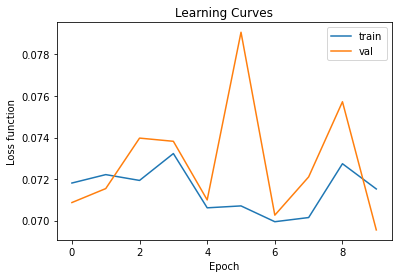

In [88]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss function')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()


## 10. Build Model KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn import metrics

y_predict = knn.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))

Test set Accuracy:  0.9577836411609498


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks))


for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    y_predict=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_predict)

mean_acc

array([0.9525066 , 0.95778364, 0.95778364, 0.94722955, 0.94459103,
       0.93403694, 0.94459103, 0.94195251, 0.94195251, 0.94195251])

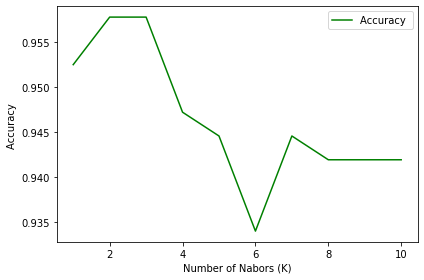

In [ ]:
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9577836411609498 with k= 2
